In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2
%matplotlib inline

In [2]:
# Load all the model
haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# pickle files
mean = pickle.load(open("./data/mean_preprocess.pickle",'rb'))
model_svm = pickle.load(open("./model_svm.pickle",'rb'))
model_pca = pickle.load(open("./data/pca_50.pickle",'rb'))

print('Model loaded successfully')

Model loaded successfully


In [3]:
# test data
!ls

Cropping Images.ipynb        agnik
Make Pipeline Model.ipynb    data
Structuring Data & PCA.ipynb model_svm.pickle
Training ML Model.ipynb      requirement.txt
Understanding Images.ipynb


In [3]:
gender_pre = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [12]:
# test_data_path = "./data/fb.jpg"
# color='bgr'
# # step 1: read Image
# img = cv2.imread(test_data_path)
# # step 2: convert into gray scale

# if color == "bgr":
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# else:
#     gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# # step 3: crop the face(using haar cascade classifier)
# faces = haar.detectMultiScale(gray,1.5,3)
# for x,y,w,h in faces:
#     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) # drawing rectangle
#     roi = gray[y:y+h, x:x+w] # crop image
#     # step-4 : normalization(0-1)
#     roi = roi/255.0
#     # step-5 : resize image (100,100)
#     if roi.shape[1]>100:
#         roi_resize = cv2.resize(roi,(100,100), cv2.INTER_AREA)
#     else:
#         roi_resize = cv2.resize(roi,(100,100), cv2.INTER_CUBIC)
        
#     # step-6: Flattening (1x10000)
#     roi_reshape = roi_resize.reshape(1,10000) # 1,-1
#     # step:7: subtract with mean
#     roi_mean = roi_reshape - mean
#     # step: 8 : get eigen image
#     eigen_image = model_pca.transform(roi_mean)
#     # step:9 : pass to ml model(svm)
#     results = model_svm.predict_proba(eigen_image)[0]    
#     # step-10: 
#     predict = results.argmax() # 0 or 1
#     score = results[predict]
#     # step-11
#     text = "%s : %0.2f"%(gender_pre[predict], score)
#     cv2.putText(img,text, (x,y),font,1,(0,255,0),2)


# cv2.imshow("Gender Prediction",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [13]:
def pipeline_model(img , color='rgb'):
    
    if color == "bgr":
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # step 3: crop the face(using haar cascade classifier)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) # drawing rectangle
        roi = gray[y:y+h, x:x+w] # crop image
        # step-4 : normalization(0-1)
        roi = roi/255.0
        # step-5 : resize image (100,100)
        if roi.shape[1]>100:
            roi_resize = cv2.resize(roi,(100,100), cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100), cv2.INTER_CUBIC)

        # step-6: Flattening (1x10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1
        # step:7: subtract with mean
        roi_mean = roi_reshape - mean
        # step: 8 : get eigen image
        eigen_image = model_pca.transform(roi_mean)
        # step:9 : pass to ml model(svm)
        results = model_svm.predict_proba(eigen_image)[0]    
        # step-10: 
        predict = results.argmax() # 0 or 1
        score = results[predict]
        # step-11
        text = "%s : %0.2f"%(gender_pre[predict], score)
        cv2.putText(img,text, (x,y),font,1,(0,255,0),2)
        
    return img


In [15]:
from PIL import Image

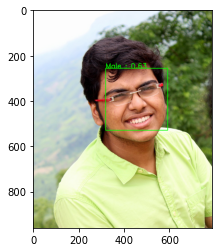

In [17]:
test_data_path = "./data/fb.jpg"
color='bgr'
# step-1: read image
img = Image.open(test_data_path)  # rgb
# step-2: convert into array
img = np.array(img)
# step-3: pass to pipeline model
img = pipeline_model(img)
plt.imshow(img)

#  Apply pipeline to video

In [4]:
cap = cv2.VideoCapture('./data/video.mp4')

while True:
    ret, frame = cap.read()
    
    if ret== False:
        break
    frame = pipeline_model(frame, color='bgr')
    
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(20) == ord('s'):  # press s to exit -- #esc key (27)
        break
        
cv2.destroyAllWindows()
cap.release()